In [58]:
import torch
import torch.nn as nn
import sklearn.datasets
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [59]:
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

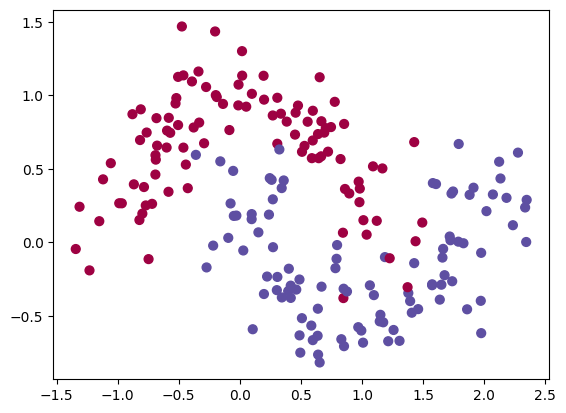

In [60]:
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap=plt.cm.Spectral)
plt.show()

In [61]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)


In [62]:
class FeedForward(torch.nn.Module):
  def __init__(self, input_neurons, hidden_neurons, output_neurons):
    super(FeedForward, self).__init__()
    self.hidden = nn.Linear(input_neurons, hidden_neurons)
    self.out = nn.Linear(hidden_neurons, output_neurons)

  def forward(self, x):
   x =  self.hidden(x)
   x = F.relu(x)
   x = self.out(x)
   return x

In [63]:
network = FeedForward(input_neurons = 2, hidden_neurons = 30, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.2)
loss_function = torch.nn.CrossEntropyLoss()

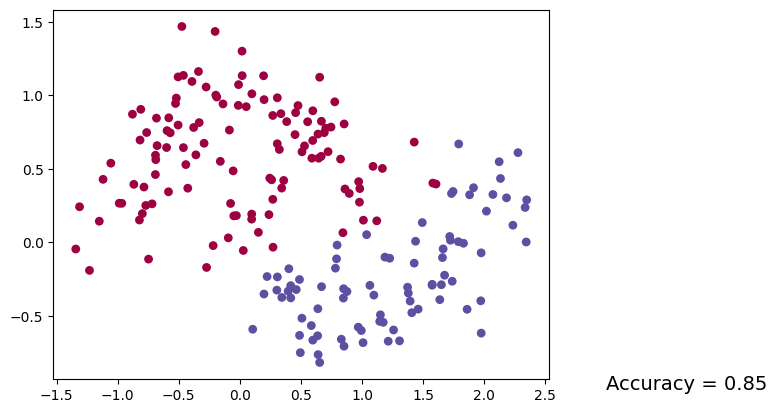

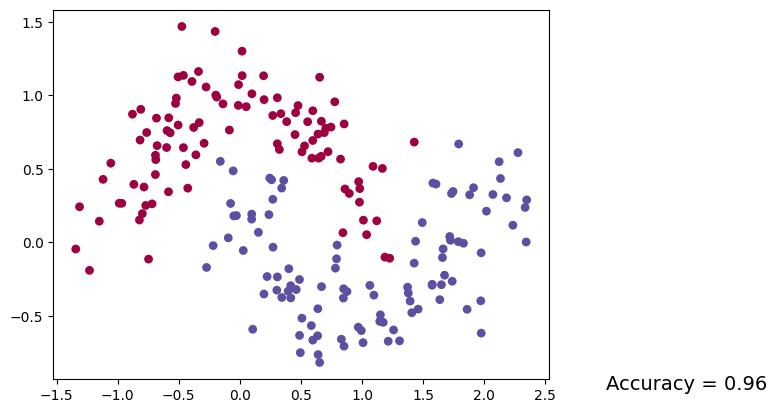

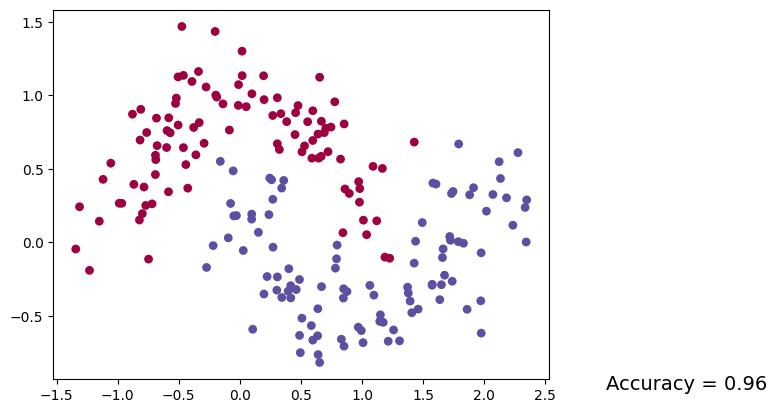

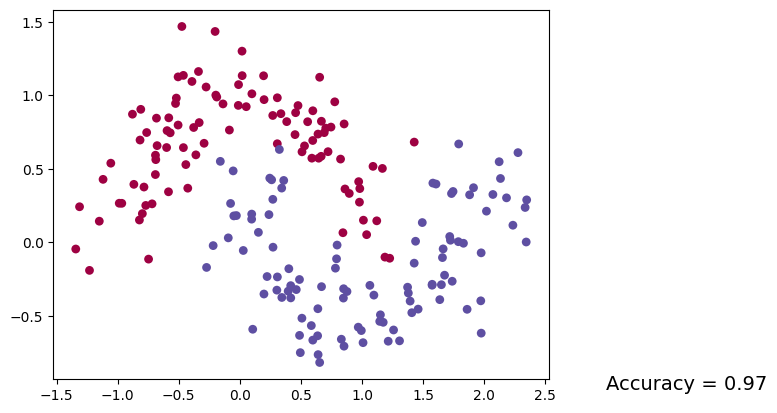

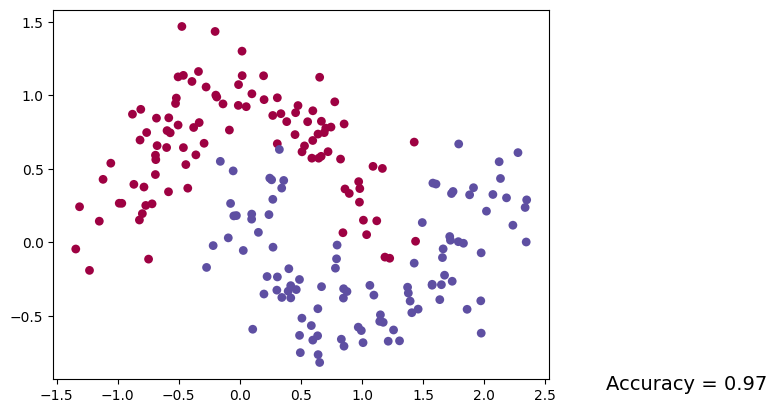

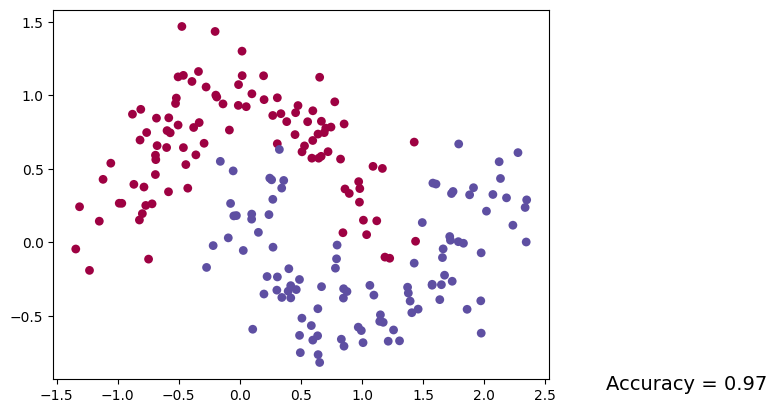

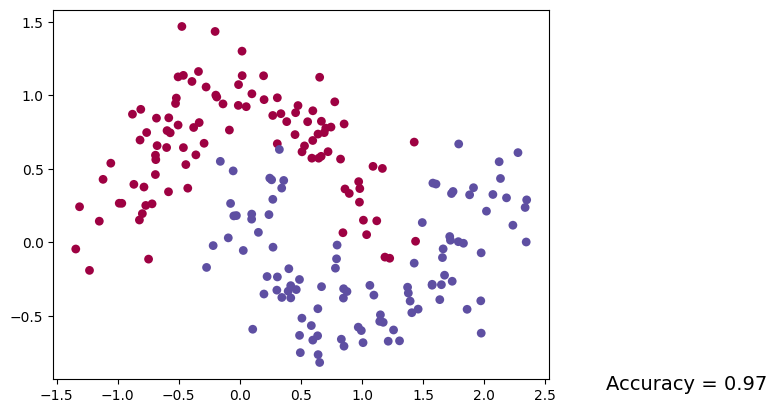

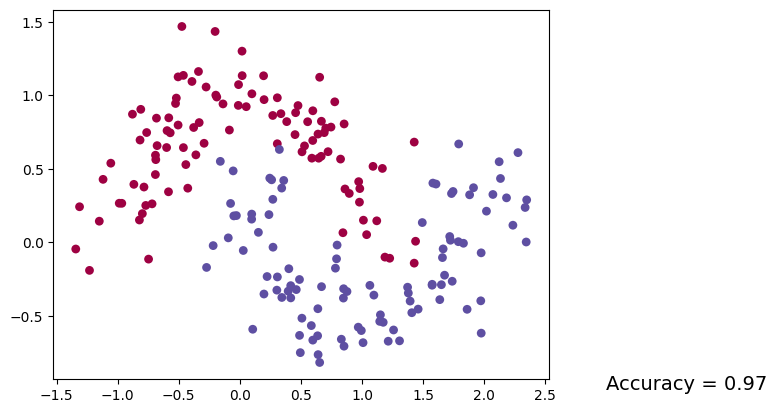

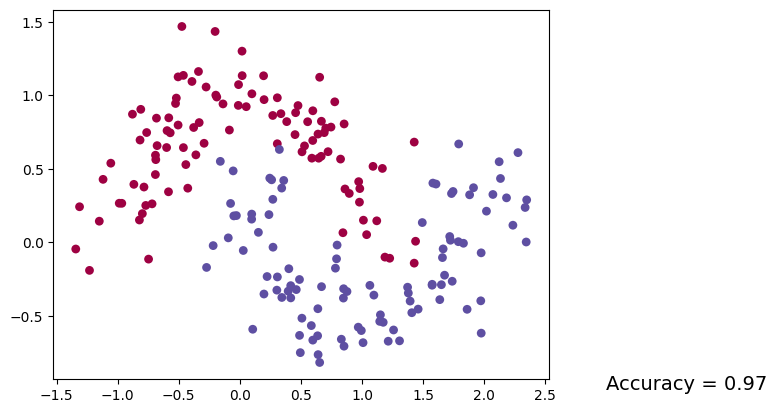

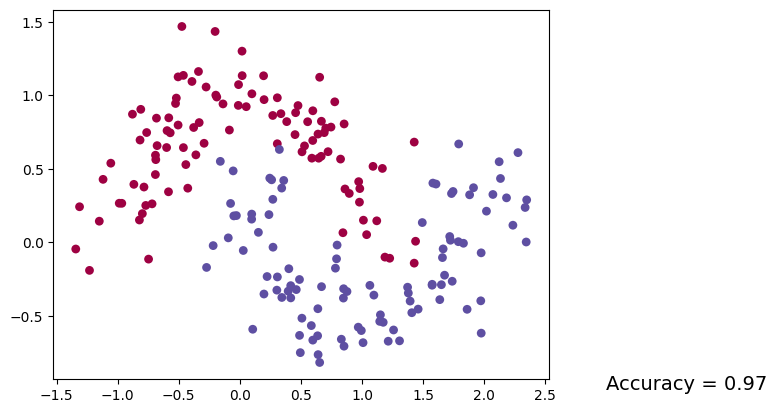

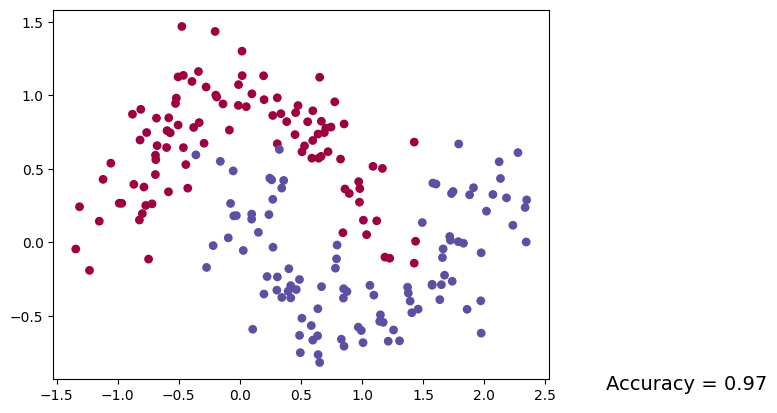

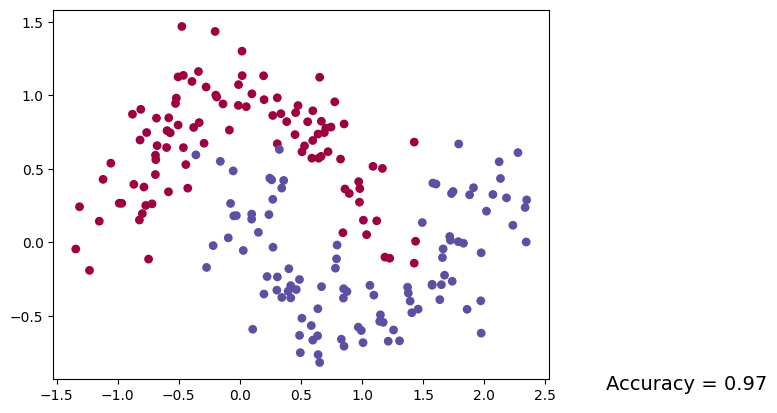

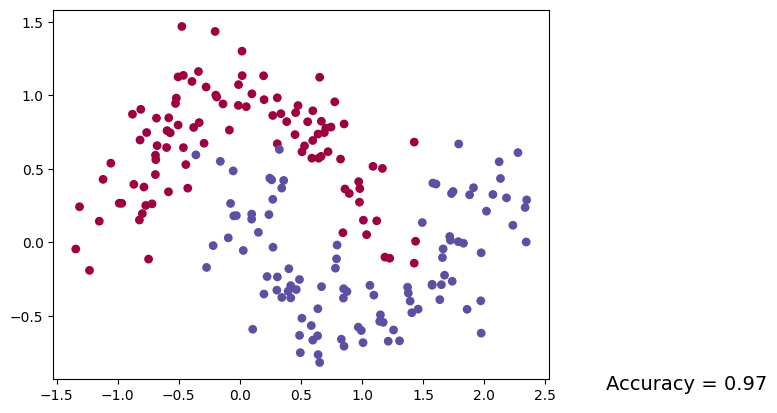

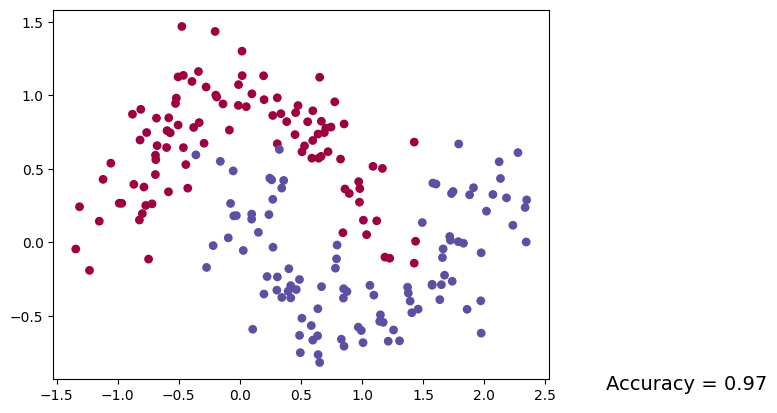

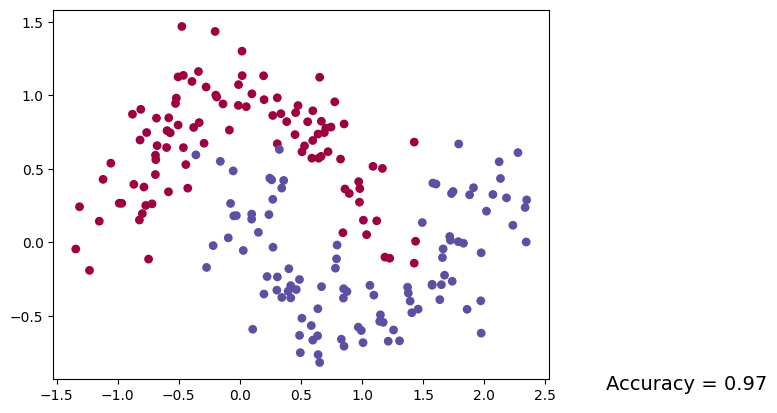

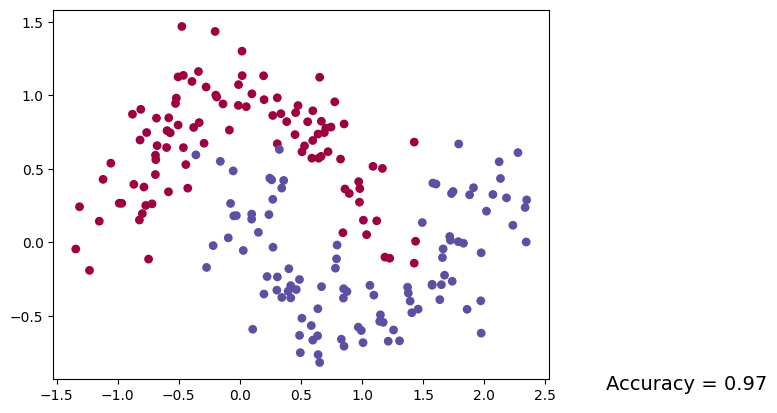

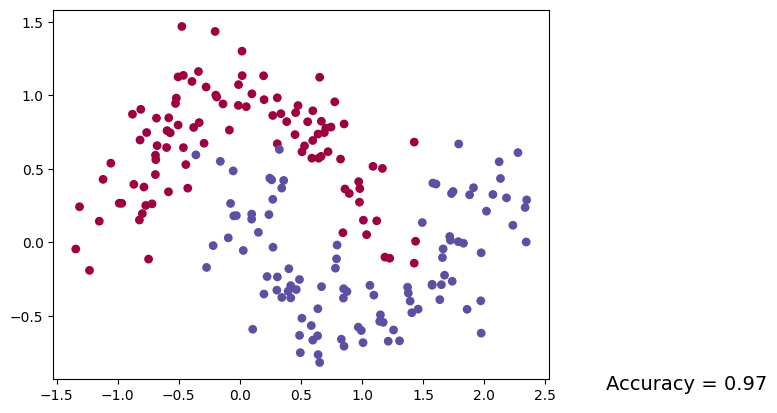

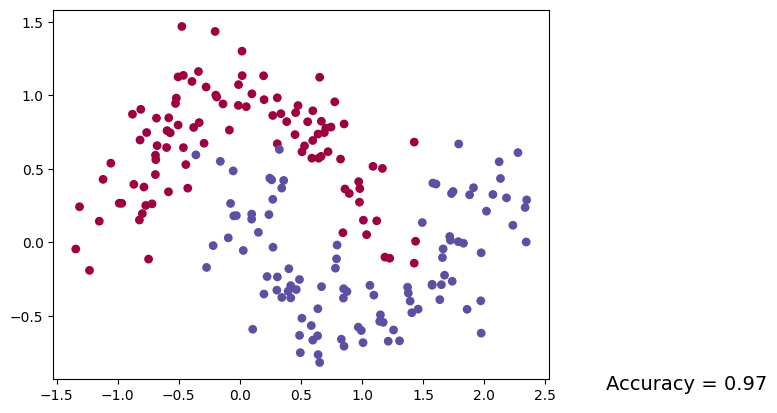

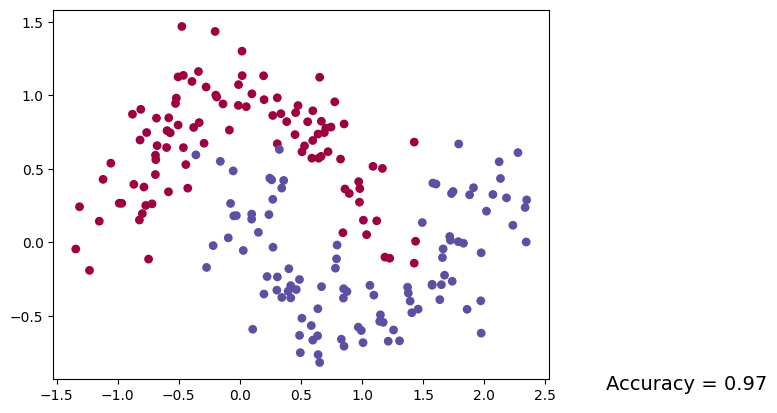

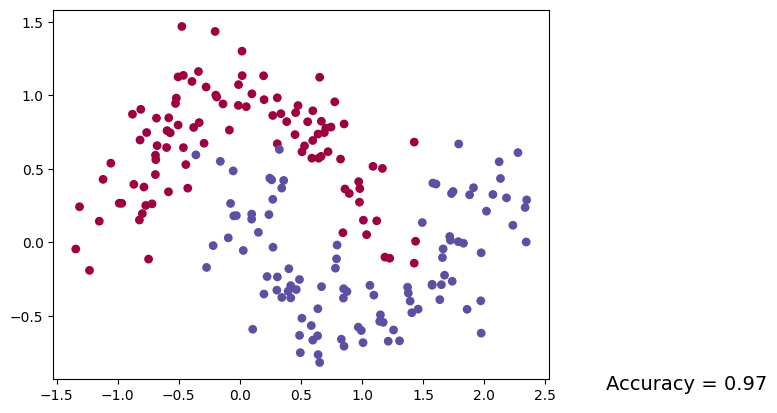

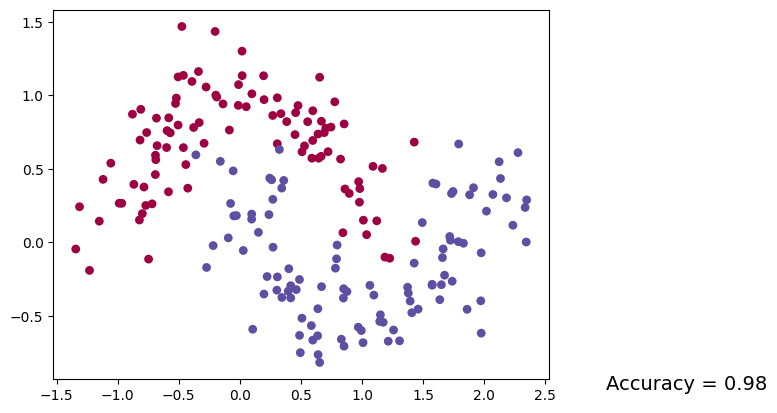

In [64]:
plt.ion()
for epoch in range(21000):
  out = network(x)
  loss = loss_function(out, y) #cal loss function (pred,actual)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() #to update weights

  #visualization
  if epoch % 1000 == 0:
    #learning process
    max_values, predication = torch.max(out,1)
    predicted_y = predication.data.numpy() #convert tensor into numpy array
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s=40, c=predicted_y, cmap=plt.cm.Spectral, lw=0)
    accuracy = (predicted_y == target_y).mean() #sum()/target_y.size
    plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {"size":14})
    plt.pause(0.1)

plt.ioff()
plt.show()